# 機械学習 課題3

※ セルを増やしても構いませんが、すでに書かれているセルの内容を変更しないで下さい。

**この課題におけるベクトルは縦ベクトルとします。**

## 1. クラスタリング

$4$個の事例からなるデータ$\mathcal{D} = \{\pmb{x}_i\}_{i=1}^4$

\begin{align}
\pmb{x}_1 = \begin{pmatrix}0 \\ 0\end{pmatrix},\;
\pmb{x}_2 = \begin{pmatrix}1 \\ 1\end{pmatrix},\;
\pmb{x}_3 = \begin{pmatrix}2 \\ 1\end{pmatrix},\;
\pmb{x}_4 = \begin{pmatrix}0 \\ 2\end{pmatrix}
\end{align}

をクラスタリングしたい。以下の問に答えよ。なお、計算は手計算でもプログラムを用いてもよいが、最終的な答えに至る経過が分かるように記述せよ。数値は小数点以下第2位まで表示するか、平方根を使って表示せよ。また、クラスタを統合するときの距離が等しいなどの理由で、クラスタの作り方が2通り以上ある場合は、そのうちのいずれかを答えればよい。

In [1]:
import numpy as np
import scipy.cluster.hierarchy
import scipy.spatial.distance
from matplotlib import pyplot as plt

**(1) 距離行列の計算（マンハッタン距離）**

距離関数としてマンハッタン距離を用いて、データ$\mathcal{D}$の距離行列を求めよ。<!-- 1(1) -->

In [2]:
def Manhattan_distance(X: np.ndarray) -> np.ndarray:
    """
    Compute the Manhattan distance matrix between each pair of points
    :param X: A matrix of shape (n, 2) where each row is a point in 2D
    :return: A matrix of shape (n, n) where the (i, j)th entry is the Manhattan distance between the i-th and j-th point
    """
    n = X.shape[0]
    dists = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            dists[i, j] = np.sum(np.abs(X[i] - X[j]))
    return dists

X: np.ndarray = np.array([[0, 0], [1, 1], [2, 1], [0, 2]])

Manhattan_distance(X)

array([[0., 2., 3., 2.],
       [2., 0., 1., 2.],
       [3., 1., 0., 3.],
       [2., 2., 3., 0.]])

In [3]:
D = scipy.spatial.distance.pdist(X, metric="cityblock")
scipy.spatial.distance.squareform(D)

array([[0., 2., 3., 2.],
       [2., 0., 1., 2.],
       [3., 1., 0., 3.],
       [2., 2., 3., 0.]])

**(2) 距離行列の計算（ユークリッド距離）**

距離関数としてユークリッド距離を用いて、データ$\mathcal{D}$の距離行列を求めよ。<!-- 1(2) -->

In [4]:
def distace_matrix(X: np.ndarray) -> np.ndarray:
    """
    Compute the Euclidean distance matrix between each pair of points
    :param X: A matrix of shape (n, 2) where each row is a point in 2D
    :return: A matrix of shape (n, n) where the (i, j)th entry is the distance between the i-th and j-th point
    """
    n = X.shape[0]
    dists = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            dists[i, j] = np.linalg.norm(X[i] - X[j])
    return dists

distace_matrix(X)

array([[0.        , 1.41421356, 2.23606798, 2.        ],
       [1.41421356, 0.        , 1.        , 1.41421356],
       [2.23606798, 1.        , 0.        , 2.23606798],
       [2.        , 1.41421356, 2.23606798, 0.        ]])

In [5]:
D = scipy.spatial.distance.pdist(X, metric="euclidean")
scipy.spatial.distance.squareform(D)

array([[0.        , 1.41421356, 2.23606798, 2.        ],
       [1.41421356, 0.        , 1.        , 1.41421356],
       [2.23606798, 1.        , 0.        , 2.23606798],
       [2.        , 1.41421356, 2.23606798, 0.        ]])

**(3) ウォード法**

データ$\mathcal{D}$に対して、初期クラスタを$C_1 = \{\pmb{x}_1\}, C_2 = \{\pmb{x}_2\}, C_3 = \{\pmb{x}_3\}, C_4 = \{\pmb{x}_4\}$として、ウォード法（Ward's method）によるクラスタリングを行いたい。

**(a) 最初の統合**

任意の2つの異なるクラスタ $A, B, \in \{C_1, C_2, C_3, C_4\}$ $(A \neq B)$ に対して、式11.17を計算し、ウォード法で最初に統合されるクラスタの組$A^*, B^*$と、その時の式11.17の値（$\mathrm{dist}_{\mathrm{ward}}(A^*, B^*)$）を答えよ。答え方の例を以下に示す。

+ 統合されるクラスタ: $\{\pmb{x}_1\}, \{\pmb{x}_2\}$
+ 式11.17の値: 1.44
<!-- 1(3)(a) -->

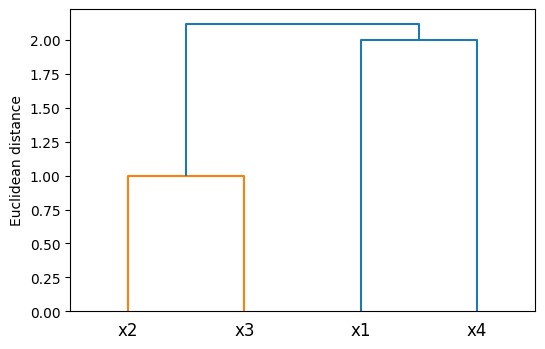

In [6]:
x1: np.ndarray = np.array([0, 0])
x2: np.ndarray = np.array([1, 1])
x3: np.ndarray = np.array([2, 1])
x4: np.ndarray = np.array([0, 2])

X = np.array([x1, x2, x3, x4])

Z = scipy.cluster.hierarchy.linkage(scipy.spatial.distance.pdist(X, metric="euclidean"), method="ward")

fig, ax = plt.subplots(dpi=100)
dn = scipy.cluster.hierarchy.dendrogram(Z, labels=["x1", "x2", "x3", "x4"], ax=ax)
ax.set_ylabel("Euclidean distance")
plt.show()

- 結合されるクラスタ: {C2}, {C3}
- 式11.17の値: 1.00  

![](../public/ward.png)

**(b) 2回目の統合**

(a)においてクラスタの統合が行われた結果、クラスタ数は3となる。これらのクラスタを改めて$C_1, C_2, C_3$と書き直す。任意の2つの異なるクラスタに対して、式11.17を計算し、ウォード法で次に統合されるクラスタの組$A^*, B^*$と、その時の式11.17の値（$\mathrm{dist}_{\mathrm{ward}}(A^*, B^*)$）を答えよ。答え方の例を以下に示す。

+ 統合されるクラスタ: $\{\pmb{x}_1, \pmb{x}_2\}, \{\pmb{x}_3\}$
+ 式11.17の値: 1.67
<!-- 1(3)(b) -->

- 結合されるクラスタ: {C1}, {C3}
- 式11.17の値: 2.00  

## 2. 主成分分析

適切な題材を選び、主成分分析（PCA）を行った結果をまとめよ。ただし、以下の観点で採点を行うので、これらを満たすように解答せよ。また、分析に用いたプログラムもJupyter Notebookにまとめよ。

+ 選んだデータの説明
+ 累積寄与率のグラフ
+ 第一主成分と第二主成分のベクトル
+ 主成分分析から分かったこと

**(1) データの説明**

選んだデータの概要（提供者、内容、データのサイズなど）を説明せよ。<!-- 2(1) -->

機械学習帳 13 主成分分析(2) で紹介されている [教育用標準データセット](https://www.nstac.go.jp/SSDSE/)を用いる。
特に、「C. 都道府県庁所在市別、家計消費データ」を用いる。

そのうち魚介類に関するデータのみ抜き出した。

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
SSDSE_df = pd.read_csv('https://www.nstac.go.jp/SSDSE/data/2021/SSDSE-C-2021.csv', encoding='shift-jis',skiprows=1)
SSDSE_df.to_csv('SSDSE-C-2021.csv', encoding='utf-8')
SSDSE_df = SSDSE_df[['都道府県','まぐろ','あじ','いわし','かつお','かれい','さけ','さば','さんま','たい', 'ぶり','いか','たこ','えび','かに']]
SSDSE_df = SSDSE_df.iloc[0:]
SSDSE_df

,都道府県,まぐろ,あじ,いわし,かつお,かれい,さけ,さば,さんま,たい,ぶり,いか,たこ,えび,かに
0,全国,5278,1094,490,1382,937,4926,949,793,952,2924,1815,1318,2936,1567
1,北海道,4899,183,282,936,1672,7431,760,1086,522,1266,2087,1415,3402,1968
2,青森県,5207,668,771,1229,1809,6706,699,1191,605,1955,3027,1136,2843,1679
3,岩手県,6270,466,404,2184,1182,5659,651,1622,314,1986,1778,1030,2094,712
4,宮城県,6574,643,384,3208,1261,5468,593,1213,401,1969,1650,1474,2663,727
5,秋田県,5050,851,660,1586,2285,5151,722,1131,722,2161,2446,918,3022,1300
6,山形県,5565,445,292,2389,1169,4433,449,1000,472,1991,1987,1218,2641,911
7,福島県,6361,442,334,2835,949,4471,488,902,371,1678,1519,951,2149,1024
8,茨城県,5772,592,379,2634,752,5205,774,1012,504,2134,1357,1035,1847,593
9,栃木県,8159,678,362,1652,515,4973,807,1017,444,1820,1551,1300,2175,1304


In [9]:
SSDSE_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   都道府県    48 non-null     object
 1   まぐろ     48 non-null     int64 
 2   あじ      48 non-null     int64 
 3   いわし     48 non-null     int64 
 4   かつお     48 non-null     int64 
 5   かれい     48 non-null     int64 
 6   さけ      48 non-null     int64 
 7   さば      48 non-null     int64 
 8   さんま     48 non-null     int64 
 9   たい      48 non-null     int64 
 10  ぶり      48 non-null     int64 
 11  いか      48 non-null     int64 
 12  たこ      48 non-null     int64 
 13  えび      48 non-null     int64 
 14  かに      48 non-null     int64 
dtypes: int64(14), object(1)
memory usage: 5.8+ KB


**(2) 累積寄与率**

累積寄与率のグラフを描け。<!-- 2(2) -->

SSDSE_dfから、年度の情報を切り落とす。
そして、さらにデータを$47\times14$の行列に変換する。
都道府県名は変数 prefectures に保存しておく、また対象とした列名も targetColumns に保存しておく

In [10]:

SSDSE_df_values = SSDSE_df.iloc[:,1:].values
SSDSE_df_values

array([[ 5278,  1094,   490,  1382,   937,  4926,   949,   793,   952,
         2924,  1815,  1318,  2936,  1567],
       [ 4899,   183,   282,   936,  1672,  7431,   760,  1086,   522,
         1266,  2087,  1415,  3402,  1968],
       [ 5207,   668,   771,  1229,  1809,  6706,   699,  1191,   605,
         1955,  3027,  1136,  2843,  1679],
       [ 6270,   466,   404,  2184,  1182,  5659,   651,  1622,   314,
         1986,  1778,  1030,  2094,   712],
       [ 6574,   643,   384,  3208,  1261,  5468,   593,  1213,   401,
         1969,  1650,  1474,  2663,   727],
       [ 5050,   851,   660,  1586,  2285,  5151,   722,  1131,   722,
         2161,  2446,   918,  3022,  1300],
       [ 5565,   445,   292,  2389,  1169,  4433,   449,  1000,   472,
         1991,  1987,  1218,  2641,   911],
       [ 6361,   442,   334,  2835,   949,  4471,   488,   902,   371,
         1678,  1519,   951,  2149,  1024],
       [ 5772,   592,   379,  2634,   752,  5205,   774,  1012,   504,
         

In [11]:
prefectures = SSDSE_df.iloc[:,0].values
prefectures

array(['全国', '北海道', '青森県', '岩手県', '宮城県', '秋田県', '山形県', '福島県', '茨城県',
       '栃木県', '群馬県', '埼玉県', '千葉県', '東京都', '神奈川県', '新潟県', '富山県', '石川県',
       '福井県', '山梨県', '長野県', '岐阜県', '静岡県', '愛知県', '三重県', '滋賀県', '京都府',
       '大阪府', '兵庫県', '奈良県', '和歌山県', '鳥取県', '島根県', '岡山県', '広島県', '山口県',
       '徳島県', '香川県', '愛媛県', '高知県', '福岡県', '佐賀県', '長崎県', '熊本県', '大分県',
       '宮崎県', '鹿児島県', '沖縄県'], dtype=object)

In [12]:
targetColumns = SSDSE_df.columns[1:].values
targetColumns

array(['まぐろ', 'あじ', 'いわし', 'かつお', 'かれい', 'さけ', 'さば', 'さんま', 'たい', 'ぶり',
       'いか', 'たこ', 'えび', 'かに'], dtype=object)

In [13]:
from sklearn.decomposition import PCA

pca = PCA()
P = pca.fit_transform(SSDSE_df_values)

pd.DataFrame(pca.components_, columns=targetColumns, index=[f'PC{i+1}' for i in range(pca.n_components_)])

,まぐろ,あじ,いわし,かつお,かれい,さけ,さば,さんま,たい,ぶり,いか,たこ,えび,かに
PC1,0.909386,-0.133515,-0.041938,0.077209,-0.067756,0.101695,-0.047278,0.035462,-0.143466,-0.301110,-0.021572,0.015031,-0.085188,-0.099230
PC2,0.130338,0.127669,-0.002866,0.801634,-0.147856,-0.338477,0.048616,-0.036386,0.080284,0.411133,0.017025,0.043615,0.062562,-0.048895
PC3,0.313515,0.069582,0.052165,-0.264437,0.178414,0.132811,0.047177,-0.014232,-0.010493,0.565349,0.232418,0.095030,0.291056,0.552113
PC4,-0.181954,-0.324840,-0.010068,0.484882,0.442700,0.298481,-0.090213,0.138759,-0.212404,-0.274926,0.199897,0.020894,-0.046090,0.387910
PC5,0.027814,0.069135,0.040193,-0.111887,0.012485,-0.726883,0.026207,-0.120204,-0.164281,-0.279291,-0.043996,-0.100032,-0.222861,0.519675
PC6,0.032889,-0.025538,-0.025622,0.049934,0.066825,-0.134281,0.085241,-0.025283,0.550943,-0.416109,-0.040828,0.187470,0.666482,0.083778
PC7,0.086821,0.740902,0.269842,0.063929,0.432531,0.078115,0.042058,0.017872,0.074977,-0.164885,0.204479,-0.273024,-0.061168,-0.135823
PC8,0.033335,-0.305805,-0.062991,-0.153662,0.453611,-0.455595,-0.140604,0.183031,-0.162307,0.141150,0.344097,-0.026483,0.191682,-0.457252
PC9,-0.089019,0.025802,-0.025899,0.033472,-0.441825,0.063787,0.175264,-0.263750,-0.374396,-0.171239,0.558246,-0.293130,0.349503,-0.029132
PC10,-0.064182,0.347683,-0.117362,0.021381,0.048626,-0.007275,-0.183686,0.061889,-0.618656,-0.057304,-0.383643,0.374580,0.381667,-0.039972


/var/folders/wl/l0q5d3r90b375sqc25hk_bsw0000gn/T/ipykernel_27469/240422092.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


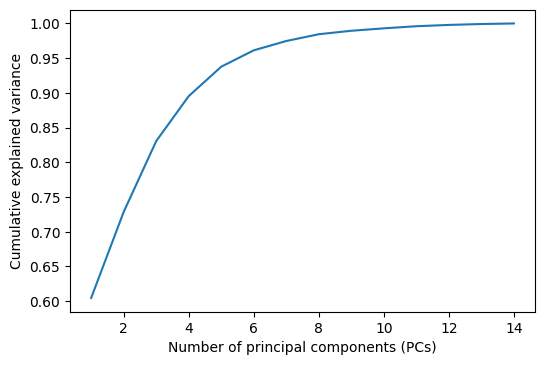

In [14]:
fig = plt.figure(dpi=100)
ax = fig.add_subplot(1,1,1)

ax.plot(np.arange(1, pca.n_components_+1), np.cumsum(pca.explained_variance_ratio_))
ax.set_xlabel('Number of principal components (PCs)')
ax.set_ylabel('Cumulative explained variance')
fig.show()

**(3)  第一主成分と第二主成分**

データの事例を第一主成分と第二主成分の軸に射影し、データを２次元平面上にプロットせよ。<!-- 2(3) -->

In [15]:
import japanize_matplotlib

/var/folders/wl/l0q5d3r90b375sqc25hk_bsw0000gn/T/ipykernel_27469/4256380017.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


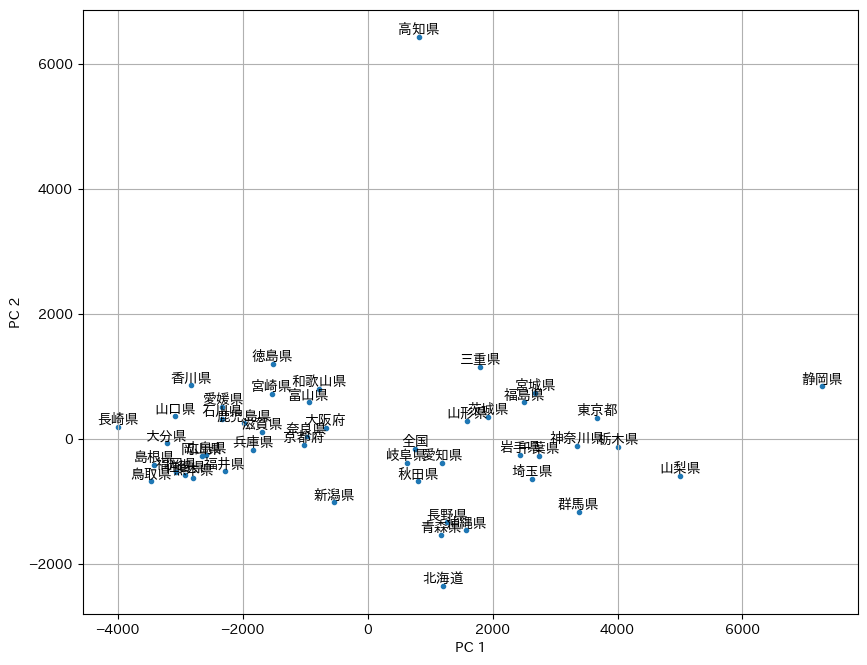

In [17]:
fig = plt.figure(dpi=100, figsize=(10, 10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')

m = ax.scatter(P[:, 0], P[:, 1], marker='.')
for i, label in enumerate(prefectures):
    ax.text(P[i][0], P[i][1], label, ha='center', va='bottom')
ax.set_aspect('equal')
ax.grid()
fig.show()

**(4) 主成分分析から分かったこと**

主成分分析からデータに関して得られた知見をまとめよ。<!-- 2(4) -->

関西地方の都道府県は、左下に、関東地方の都道府県は、右下に固まる傾向が見てとれる。
第1主成分得点が最も高いのは、静岡県であり、「マグロ」の支出額が特徴的であることが示唆される。
また、第2主成分得点が最も高いのは高知県であり、他の都道府県と比較しても特異的に高い数値になっている。これは、「カツオ」の支出額が特異的に多いことの表れであることが示唆される。